In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# carregar imagem com vários rostos
imagem = cv2.imread("imagens/px-people.jpg")

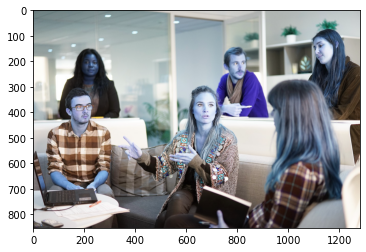

In [3]:
plt.imshow(imagem)

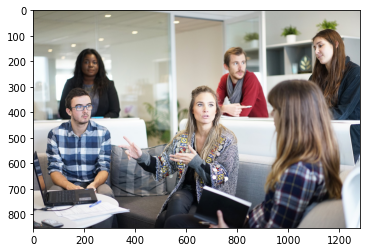

In [4]:
# converter imagem para RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

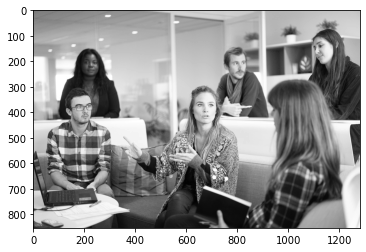

In [5]:
# O Classificador de cascata de Haar trabalha com imagens em grayscale, portanto vamos converter a imagem de acordo
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
# Como o matplotlib mapeia imagens de um só canal como Blue -> Yellow, é necessário alterar o mapa para gray para correta exibição
plt.imshow(imagem_gray, cmap='gray')

In [6]:
# Carregar o classificafor para rostos frontais
# Ele já foi treinado para diversas faces e fazer segmentação rápida da ROI da imagem
classificador = cv2.CascadeClassifier("classificadores/haarcascade_frontalface_default.xml")

In [7]:
# o primeiro parâmetro diminui é a taxa de diminuição (30%) do retângulo 
# deslizante até q seja encontrado o maior número de faces e até um limite mínimo (24 pixels?).
# O segundo é o número mínimo de características vizinhas que ele vai juntar. deve ser definida de acordo com o melhor nível de detecção
faces = classificador.detectMultiScale(imagem_gray,1.3, 5)


In [8]:
len(faces)

5

O tamanho da variável faces é 5, o que significa que é um array com os 5 rostos q foram detectados.
A variável é uma lista de faces, onde cada elemento pode ser acessado como uma lista normal:

In [9]:
# Ex: listar dados da primeira face
faces[0]

array([1088,  102,  101,  101], dtype=int32)

As coordenadas da primeira face encontrada foram listadas anteriormente (1088,  102,  101,  101)

# Destacando as ROI


In [10]:
# fazendo cópia p/n alterar a original
imagem_anotada = imagem.copy()

In [11]:
# fechar um loop p/desenhar todos os retângulos
for (x,y,w,h) in faces:
    # A biblioteca cv2 tem uma função para desenhar retângulos, a cv2.rectangle.
    # Ela recebe a imagem, as coordenadas dos pontos do retângulo, a cor (em RGB)
    # e a lasrgura da borda (em pixels)
    cv2.rectangle(imagem_anotada, (x,y), (x+w,y+h),(255,255,0),2)

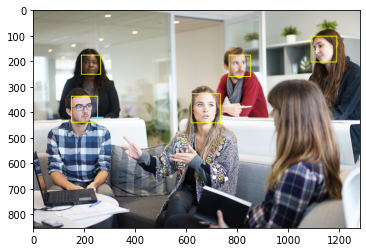

In [12]:
plt.imshow(imagem_anotada)

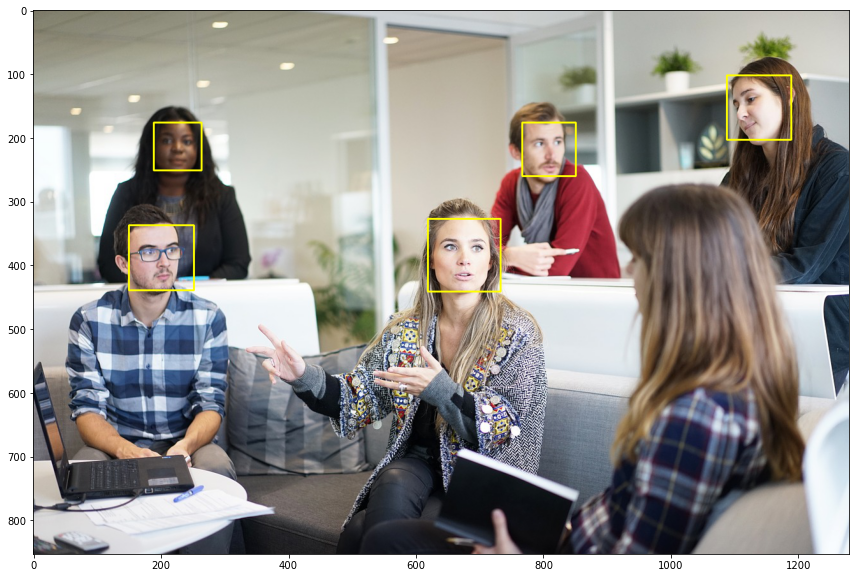

In [13]:
# amentar o tamanho da imagem
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

# Cortando a imagem original e salvando um arquivo individual para cada face encontrada

In [17]:
face_imagem = 0 
for (x,y,w,h) in faces:
    # recortar o roi passando os pontos do retangulo
    imagem_roi = imagem[y:y+h, x:x+w]
    # converter imagem para BGR (para q nao fique com cores estranhas ao ver no navegador)
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    # salvar
    cv2.imwrite("face_" + str(face_imagem) + ".png",imagem_roi )
    face_imagem += 1

O loop salvará cara ROI na pasta indicada